##  **Some Helper Function:**

### Softmax Function:

In [2]:
import pandas as pd

# Load MNIST dataset from uploaded file
file_path = "/content/mnist_dataset.csv"
df = pd.read_csv(file_path)

# Display first 5 rows
print(df.head())


   label  pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  \
0      5        0        0        0        0        0        0        0   
1      0        0        0        0        0        0        0        0   
2      4        0        0        0        0        0        0        0   
3      1        0        0        0        0        0        0        0   
4      9        0        0        0        0        0        0        0   

   pixel_7  pixel_8  ...  pixel_774  pixel_775  pixel_776  pixel_777  \
0        0        0  ...          0          0          0          0   
1        0        0  ...          0          0          0          0   
2        0        0  ...          0          0          0          0   
3        0        0  ...          0          0          0          0   
4        0        0  ...          0          0          0          0   

   pixel_778  pixel_779  pixel_780  pixel_781  pixel_782  pixel_783  
0          0          0          0          0 

In [8]:
import numpy as np

def softmax(z):
    """
    Compute the softmax probabilities for a given input matrix.

    Parameters:
    z (numpy.ndarray): Logits (raw scores) of shape (m, n), where
                       - m is the number of samples.
                       - n is the number of classes.

    Returns:
    numpy.ndarray: Softmax probability matrix of shape (m, n), where
                   each row sums to 1 and represents the probability
                   distribution over classes.

    Notes:
    - The input to softmax is typically computed as: z = XW + b.
    - Uses numerical stabilization by subtracting the max value per row.
    """

    # Ensure input is a numpy array
    z = np.array(z)

    # Subtract max value from each row for numerical stability
    z_max = np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z - z_max)

    # Compute softmax probabilities
    softmax_probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)

    return softmax_probs

# Example Usage:
z = np.array([[2.0, 1.0, 0.1],
              [1.0, 3.0, 1.5]])

print(softmax(z))


[[0.65900114 0.24243297 0.09856589]
 [0.09962365 0.73612472 0.16425163]]


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def plot_sample_images(X, y):
    """
    Plots one sample image for each digit class (0-9).

    Arguments:
    X (np.ndarray): Feature matrix containing pixel values.
    y (np.ndarray): Labels corresponding to images.
    """
    plt.figure(figsize=(10, 4))
    unique_classes = np.unique(y)  # Get unique class labels

    for i, digit in enumerate(unique_classes):
        index = np.where(y == digit)[0][0]  # Find first occurrence of the class
        image = X[index].reshape(28, 28)  # Reshape 1D array to 28x28
        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Digit: {digit}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


Dataset shape: (60000, 785)
Training set shape: X_train: (48000, 784), y_train: (48000,)
Test set shape: X_test: (12000, 784), y_test: (12000,)


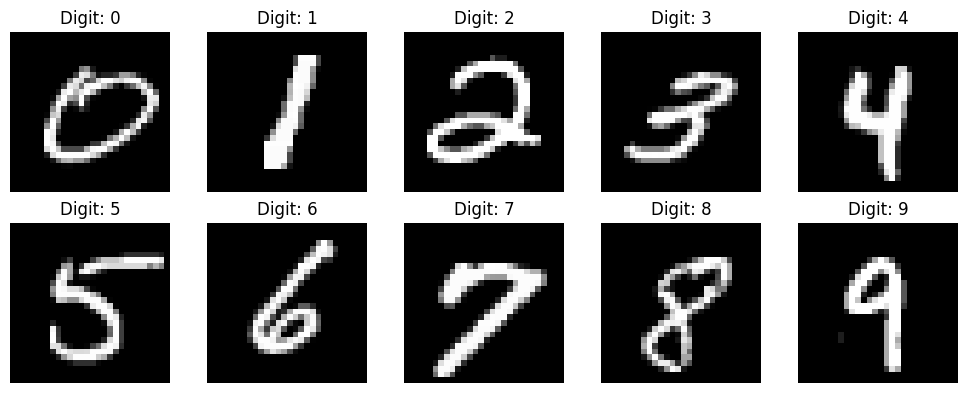

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("/content/mnist_dataset.csv")

# Check if dataset has the correct shape
print(f"Dataset shape: {df.shape}")  # Should be (60000, 785)

# Extract labels and features
y = df.iloc[:, 0].values  # First column is labels
X = df.iloc[:, 1:].values  # Remaining columns are pixels

# Ensure the dataset has the correct shape
if X.shape[1] != 784:
    raise ValueError(f"Error: Expected 784 features, found {X.shape[1]}.")

# Normalize pixel values
X = X / 255.0

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shape
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

# Function to plot images
plot_sample_images(X_train, y_train)


### Softmax Test Case:

This test case checks that each row in the resulting softmax probabilities sums to 1, which is the fundamental property of softmax.

In [ ]:
# Example test case
z_test = np.array([[2.0, 1.0, 0.1], [1.0, 1.0, 1.0]])
softmax_output = softmax(z_test)

# Verify if the sum of probabilities for each row is 1 using assert
row_sums = np.sum(softmax_output, axis=1)

# Assert that the sum of each row is 1
assert np.allclose(row_sums, 1), f"Test failed: Row sums are {row_sums}"

print("Softmax function passed the test case!")

Softmax function passed the test case!


### Prediction Function:

In [ ]:
import numpy as np

def predict_softmax(X, W, b):
    """
    Predict the class labels for a set of samples using the trained softmax model.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d), where n is the number of samples and d is the number of features.
    W (numpy.ndarray): Weight matrix of shape (d, c), where c is the number of classes.
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    numpy.ndarray: Predicted class labels of shape (n,), where each value is the index of the predicted class.
    """

    # Compute logits (raw scores)
    logits = np.dot(X, W) + b  # Shape: (n, c)

    # Apply softmax function
    softmax_probs = np.exp(logits - np.max(logits, axis=1, keepdims=True))  # Numerical stability
    softmax_probs /= np.sum(softmax_probs, axis=1, keepdims=True)

    # Get predicted class labels (index of max probability in each row)
    predicted_classes = np.argmax(softmax_probs, axis=1)

    return predicted_classes

# Example Usage:
X = np.array([[0.2, 0.4], [0.8, 0.5]])  # (2 samples, 2 features)
W = np.array([[0.5, -0.2, 0.3], [0.1, 0.7, -0.5]])  # (2 features, 3 classes)
b = np.array([0.1, -0.3, 0.2])  # Bias for 3 classes

predictions = predict_softmax(X, W, b)
print(predictions)  # Output: Array of predicted class labels


[0 0]


### Test Function for Prediction Function:
The test function ensures that the predicted class labels have the same number of elements as the input samples, verifying that the model produces a valid output shape.

Test passed! Predicted labels have correct shape and valid class labels.


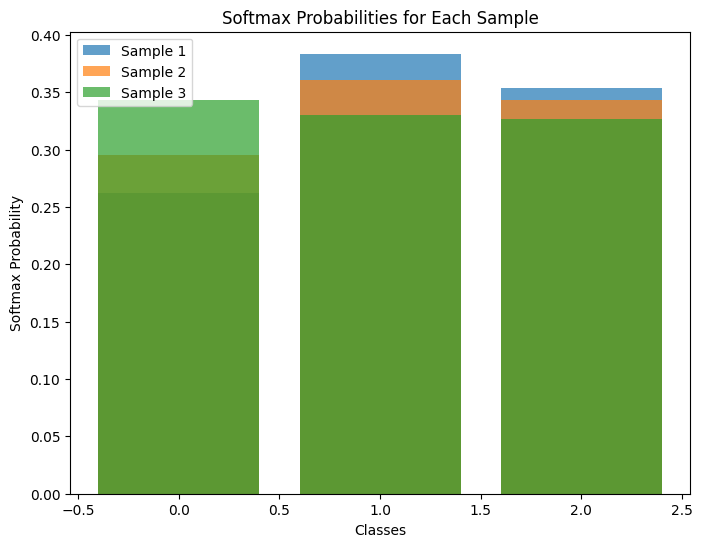

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def predict_softmax(X, W, b):
    """
    Predict class labels for given samples using the trained softmax model.
    """
    logits = np.dot(X, W) + b  # Compute raw scores
    softmax_probs = np.exp(logits - np.max(logits, axis=1, keepdims=True))  # Numerical stability
    softmax_probs /= np.sum(softmax_probs, axis=1, keepdims=True)  # Normalize

    predicted_classes = np.argmax(softmax_probs, axis=1)  # Get class with highest probability
    return predicted_classes, softmax_probs

def test_predict_softmax():
    """
    Test the predict_softmax function to ensure the output has the correct shape.
    """
    # Define test case
    X_test = np.array([[0.2, 0.8], [0.5, 0.5], [0.9, 0.1]])  # (3 samples, 2 features)
    W_test = np.array([[0.4, 0.2, 0.1], [0.3, 0.7, 0.5]])  # (2 features, 3 classes)
    b_test = np.array([0.1, 0.2, 0.3])  # (3 classes)

    # Get predictions and probabilities from predict_softmax function
    y_pred_test, softmax_probs = predict_softmax(X_test, W_test, b_test)

    # Validate the shape of the predicted labels
    assert y_pred_test.shape == (X_test.shape[0],), f"Test failed: Expected shape ({X_test.shape[0]},), got {y_pred_test.shape}"

    # Validate that the predictions are within the expected range of class labels
    assert np.all(np.isin(y_pred_test, np.arange(W_test.shape[1]))), "Test failed: Predictions contain invalid class labels"

    # If the test passes, print success message
    print("Test passed! Predicted labels have correct shape and valid class labels.")

    # Visualize Softmax Probabilities
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot softmax probabilities
    for i, prob in enumerate(softmax_probs):
        ax.bar(np.arange(len(prob)), prob, label=f"Sample {i+1}", alpha=0.7)

    ax.set_xlabel('Classes')
    ax.set_ylabel('Softmax Probability')
    ax.set_title('Softmax Probabilities for Each Sample')
    ax.legend()

    plt.show()

# Run the test
test_predict_softmax()


### Loss Function:

In [ ]:
import numpy as np

def loss_softmax(y_pred, y):
    """
    Compute the cross-entropy loss for a single sample.

    Parameters:
    y_pred (numpy.ndarray): Predicted probabilities of shape (c,) for a single sample,
                             where c is the number of classes.
    y (numpy.ndarray): True labels (one-hot encoded) of shape (c,), where c is the number of classes.

    Returns:
    float: Cross-entropy loss for the given sample.
    """

    # Compute the cross-entropy loss
    loss = -np.sum(y * np.log(y_pred + 1e-15))  # Adding small epsilon for numerical stability

    return loss

# Test case:
y_pred_test = np.array([0.2, 0.5, 0.3])  # Predicted probabilities for 3 classes
y_true_test = np.array([0, 1, 0])        # One-hot encoded true label (class 1 is correct)

loss = loss_softmax(y_pred_test, y_true_test)
print("Cross-entropy loss:", loss)


Cross-entropy loss: 0.6931471805599433


## Test case for Loss Function:
This test case Compares loss for correct vs. incorrect predictions.
*   Expects low loss for correct predictions.
*   Expects high loss for incorrect predictions.

In [ ]:
import numpy as np

# Define correct predictions (low loss scenario)
y_true_correct = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # True one-hot labels
y_pred_correct = np.array([[0.9, 0.05, 0.05],
                           [0.1, 0.85, 0.05],
                           [0.05, 0.1, 0.85]])  # High confidence in the correct class

# Define incorrect predictions (high loss scenario)
y_pred_incorrect = np.array([[0.05, 0.05, 0.9],  # Highly confident in the wrong class
                              [0.1, 0.05, 0.85],
                              [0.85, 0.1, 0.05]])

# Compute loss for both cases
loss_correct = loss_softmax(y_pred_correct, y_true_correct)
loss_incorrect = loss_softmax(y_pred_incorrect, y_true_correct)

# Validate that incorrect predictions lead to a higher loss
assert loss_correct < loss_incorrect, f"Test failed: Expected loss_correct < loss_incorrect, but got {loss_correct:.4f} >= {loss_incorrect:.4f}"

# Print results
print(f"Cross-Entropy Loss (Correct Predictions): {loss_correct:.4f}")
print(f"Cross-Entropy Loss (Incorrect Predictions): {loss_incorrect:.4f}")

Cross-Entropy Loss (Correct Predictions): 0.4304
Cross-Entropy Loss (Incorrect Predictions): 8.9872


### Cost Function:

In [ ]:
def cost_softmax(X, y, W, b):
    """
    Compute the average softmax regression cost (cross-entropy loss) over all samples.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d), where n is the number of samples and d is the number of features.
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c), where n is the number of samples and c is the number of classes.
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    float: Average softmax cost (cross-entropy loss) over all samples.
    """

    total_loss = # Your Code Here

    # Return average loss
    return total_loss / n

### Test Case for Cost Function:
The test case assures that the cost for the incorrect prediction should be higher than for the correct prediction, confirming that the cost function behaves as expected.

In [ ]:
import numpy as np

# Example 1: Correct Prediction (Closer predictions)
X_correct = np.array([[1.0, 0.0], [0.0, 1.0]])  # Feature matrix for correct predictions
y_correct = np.array([[1, 0], [0, 1]])  # True labels (one-hot encoded, matching predictions)
W_correct = np.array([[5.0, -2.0], [-3.0, 5.0]])  # Weights for correct prediction
b_correct = np.array([0.1, 0.1])  # Bias for correct prediction

# Example 2: Incorrect Prediction (Far off predictions)
X_incorrect = np.array([[0.1, 0.9], [0.8, 0.2]])  # Feature matrix for incorrect predictions
y_incorrect = np.array([[1, 0], [0, 1]])  # True labels (one-hot encoded, incorrect predictions)
W_incorrect = np.array([[0.1, 2.0], [1.5, 0.3]])  # Weights for incorrect prediction
b_incorrect = np.array([0.5, 0.6])  # Bias for incorrect prediction

# Compute cost for correct predictions
cost_correct = cost_softmax(X_correct, y_correct, W_correct, b_correct)

# Compute cost for incorrect predictions
cost_incorrect = cost_softmax(X_incorrect, y_incorrect, W_incorrect, b_incorrect)

# Check if the cost for incorrect predictions is greater than for correct predictions
assert cost_incorrect > cost_correct, f"Test failed: Incorrect cost {cost_incorrect} is not greater than correct cost {cost_correct}"

# Print the costs for verification
print("Cost for correct prediction:", cost_correct)
print("Cost for incorrect prediction:", cost_incorrect)

print("Test passed!")


Cost for correct prediction: 0.0006234364133349324
Cost for incorrect prediction: 0.29930861359446115
Test passed!


### Computing Gradients:

In [ ]:
def compute_gradient_softmax(X, y, W, b):
    """
    Compute the gradients of the cost function with respect to weights and biases.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    tuple: Gradients with respect to weights (d, c) and biases (c,).
    """


    grad_W = # Your Code Here  # Gradient with respect to weights
    grad_b = #Your Code Here # Gradient with respect to biases

    return grad_W, grad_b

### Test case for compute_gradient function:
The test checks if the gradients from the function are close enough to the manually computed gradients using np.allclose, which accounts for potential floating-point discrepancies.

In [ ]:
import numpy as np

# Define a simple feature matrix and true labels
X_test = np.array([[0.2, 0.8], [0.5, 0.5], [0.9, 0.1]])  # Feature matrix (3 samples, 2 features)
y_test = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # True labels (one-hot encoded, 3 classes)

# Define weight matrix and bias vector
W_test = np.array([[0.4, 0.2, 0.1], [0.3, 0.7, 0.5]])  # Weights (2 features, 3 classes)
b_test = np.array([0.1, 0.2, 0.3])  # Bias (3 classes)

# Compute the gradients using the function
grad_W, grad_b = compute_gradient_softmax(X_test, y_test, W_test, b_test)

# Manually compute the predicted probabilities (using softmax function)
z_test = np.dot(X_test, W_test) + b_test
y_pred_test = softmax(z_test)

# Compute the manually computed gradients
grad_W_manual = np.dot(X_test.T, (y_pred_test - y_test)) / X_test.shape[0]
grad_b_manual = np.sum(y_pred_test - y_test, axis=0) / X_test.shape[0]

# Assert that the gradients computed by the function match the manually computed gradients
assert np.allclose(grad_W, grad_W_manual), f"Test failed: Gradients w.r.t. W are not equal.\nExpected: {grad_W_manual}\nGot: {grad_W}"
assert np.allclose(grad_b, grad_b_manual), f"Test failed: Gradients w.r.t. b are not equal.\nExpected: {grad_b_manual}\nGot: {grad_b}"

# Print the gradients for verification
print("Gradient w.r.t. W:", grad_W)
print("Gradient w.r.t. b:", grad_b)

print("Test passed!")


Gradient w.r.t. W: [[ 0.1031051   0.01805685 -0.12116196]
 [-0.13600547  0.00679023  0.12921524]]
Gradient w.r.t. b: [-0.03290036  0.02484708  0.00805328]
Test passed!


### Implementing Gradient Descent:

In [ ]:
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    """
    Perform gradient descent to optimize the weights and biases.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).
    alpha (float): Learning rate.
    n_iter (int): Number of iterations.
    show_cost (bool): Whether to display the cost at intervals.

    Returns:
    tuple: Optimized weights, biases, and cost history.
    """
    cost_history = []

    for i in range(n_iter):
        # Compute gradients
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
        # Your Code Here
        """
        """"
    return W, b, cost_history


## Preparing Dataset:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def load_and_prepare_mnist(csv_file, test_size=0.2, random_state=42):
    """
    Reads the MNIST CSV file, splits data into train/test sets, and plots one image per class.

    Arguments:
    csv_file (str)       : Path to the CSV file containing MNIST data.
    test_size (float)    : Proportion of the data to use as the test set (default: 0.2).
    random_state (int)   : Random seed for reproducibility (default: 42).

    Returns:
    X_train, X_test, y_train, y_test : Split dataset.
    """

    # Load dataset
    df = pd.read_csv(csv_file)

    # Separate labels and features
    y = df.iloc[:, 0].values  # First column is the label
    X = df.iloc[:, 1:].values  # Remaining columns are pixel values

    # Normalize pixel values (optional but recommended)
    X = X / 255.0  # Scale values between 0 and 1

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Plot one sample image per class
    plot_sample_images(X, y)

    return X_train, X_test, y_train, y_test

def plot_sample_images(X, y):
    """
    Plots one sample image for each digit class (0-9).

    Arguments:
    X (np.ndarray): Feature matrix containing pixel values.
    y (np.ndarray): Labels corresponding to images.
    """

    plt.figure(figsize=(10, 4))
    unique_classes = np.unique(y)  # Get unique class labels

    for i, digit in enumerate(unique_classes):
        index = np.where(y == digit)[0][0]  # Find first occurrence of the class
        image = X[index].reshape(28, 28)  # Reshape 1D array to 28x28

        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Digit: {digit}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


### **A Quick debugging Step:**

In [15]:
# Assert that X and y have matching lengths
assert len(X_train) == len(y_train), f"Error: X and y have different lengths! X={len(X_train)}, y={len(y_train)}"
print("Move forward: Dimension of Feture Matrix X and label vector y matched.")

Move forward: Dimension of Feture Matrix X and label vector y matched.


## **Train the Model:**

In [7]:
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (800, 20)
Test data shape: (200, 20)


Iteration 0, Cost: 1.0914545460414273
Iteration 100, Cost: 0.7050626810111759
Iteration 200, Cost: 0.7040937534658961
Iteration 300, Cost: 0.7039428837896134
Iteration 400, Cost: 0.7039135005109931
Iteration 500, Cost: 0.7039073665878383
Iteration 600, Cost: 0.7039060418717544
Iteration 700, Cost: 0.7039057508490845
Iteration 800, Cost: 0.7039056863678249
Iteration 900, Cost: 0.7039056720203593


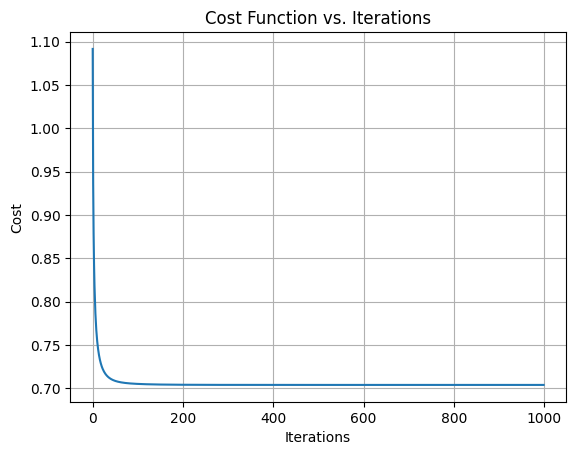

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Check if y_train is one-hot encoded
if len(y_train.shape) == 1:
    encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output=False for newer versions of sklearn
    y_train = encoder.fit_transform(y_train.reshape(-1, 1))  # One-hot encode labels
    y_test = encoder.transform(y_test.reshape(-1, 1))  # One-hot encode test labels

# Now y_train is one-hot encoded, and we can proceed to use it
d = X_train.shape[1]  # Number of features (columns in X_train)
c = y_train.shape[1]  # Number of classes (columns in y_train after one-hot encoding)

# Initialize weights with small random values and biases with zeros
W = np.random.randn(d, c) * 0.01  # Small random weights initialized
b = np.zeros(c)  # Bias initialized to 0

# Set hyperparameters for gradient descent
alpha = 0.1  # Learning rate
n_iter = 1000  # Number of iterations to run gradient descent

# Train the model using gradient descent
W_opt, b_opt, cost_history = gradient_descent_softmax(X_train, y_train, W, b, alpha, n_iter, show_cost=True)

# Plot the cost history to visualize the convergence
plt.plot(cost_history)
plt.title('Cost Function vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()


## **Evaluating the Model:**

Confusion Matrix:
 [[2 0 0]
 [0 2 0]
 [1 0 0]]
Precision: 0.6666666666666666
Recall: 0.8
F1 Score: 0.72


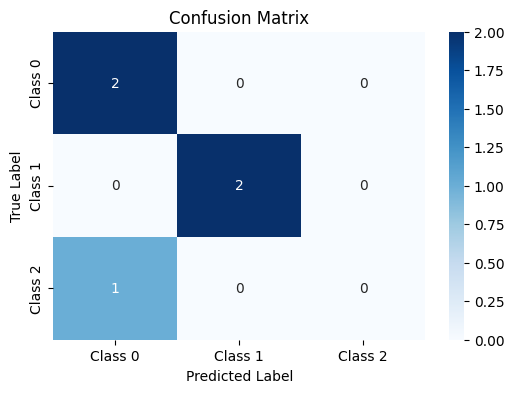

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def evaluate_classification(y_true, y_pred):
    """
    Evaluate classification performance using confusion matrix, precision, recall, and F1-score.

    Parameters:
    y_true (numpy.ndarray): True labels (integer class labels or one-hot encoded)
    y_pred (numpy.ndarray): Predicted labels (integer class labels or one-hot encoded)

    Returns:
    tuple: (Confusion matrix, precision, recall, F1 score)
    """
    # Handle empty input cases
    if len(y_true) == 0 or len(y_pred) == 0:
        raise ValueError("Error: y_true or y_pred is empty. Check your input labels.")

    # Convert one-hot encoded labels to class labels
    if len(y_true.shape) > 1 and y_true.shape[1] > 1:
        y_true = np.argmax(y_true, axis=1)
    if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:
        y_pred = np.argmax(y_pred, axis=1)

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Compute precision, recall, and F1-score (handle division by zero errors)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    return cm, precision, recall, f1

def plot_confusion_matrix(cm, class_labels):
    """
    Plot a confusion matrix using seaborn.

    Parameters:
    cm (numpy.ndarray): Confusion matrix
    class_labels (list): List of class names
    """
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Example Usage
y_true_one_hot = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 1], [1, 0, 0], [0, 1, 0]])  # One-hot encoded
y_pred_one_hot = np.array([[0, 1, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0]])  # One-hot encoded

# Evaluate classification
cm, precision, recall, f1 = evaluate_classification(y_true_one_hot, y_pred_one_hot)

# Print results
print("Confusion Matrix:\n", cm)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot confusion matrix
class_labels = ["Class 0", "Class 1", "Class 2"]  # Adjust based on your dataset
plot_confusion_matrix(cm, class_labels)


Training data shape: (48000, 784)
Test data shape: (12000, 784)

Training Softmax Regression Model...
Iteration 0, Cost: 2.3085
Iteration 100, Cost: 0.6106
Iteration 200, Cost: 0.4909
Iteration 300, Cost: 0.4417
Iteration 400, Cost: 0.4134
Iteration 500, Cost: 0.3944
Iteration 600, Cost: 0.3804
Iteration 700, Cost: 0.3697
Iteration 800, Cost: 0.3610
Iteration 900, Cost: 0.3538


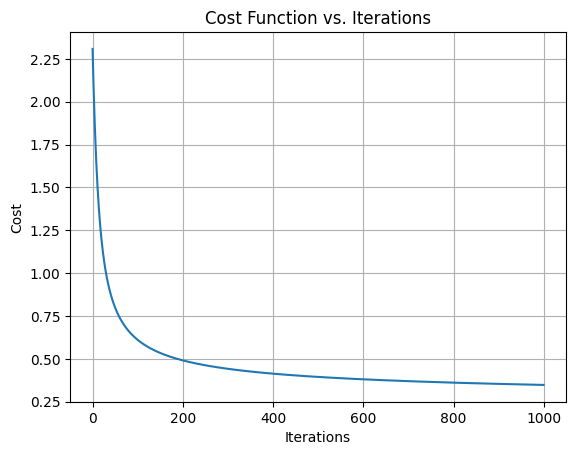


Confusion Matrix:
[[1127    0    5    2    3   11    9    2   13    3]
 [   0 1274    7   11    1    5    1    4   18    1]
 [   1   15 1027   16   19    4   26   25   33    8]
 [   8    5   34 1050    1   54    9    8   29   21]
 [   1    5    7    1 1095    0   10    4    4   49]
 [  22   14   13   42   11  923   13    7   45   14]
 [   7    2   10    1   11   15 1119    2   10    0]
 [   7   27   24    4   15    3    0 1181    7   31]
 [   8   27   13   35    9   33   13    6 1001   15]
 [   8    6   10   18   44    9    0   39   10 1050]]
Precision: 0.90
Recall: 0.90
F1-Score: 0.90


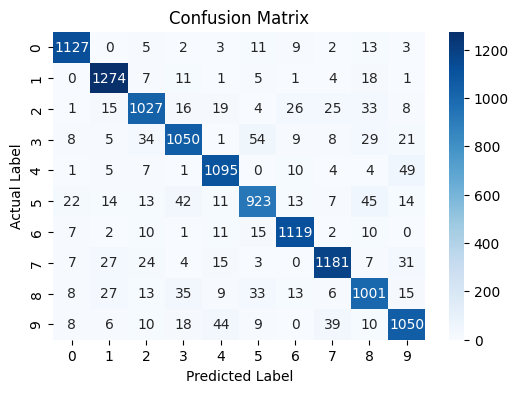

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# 1️⃣ Load and Prepare the MNIST Dataset
def load_mnist(csv_file):
    df = pd.read_csv(csv_file)
    y = df.iloc[:, 0].values  # Labels (First column)
    X = df.iloc[:, 1:].values  # Features (Remaining columns)

    # Normalize pixel values (scale between 0 and 1)
    X = X / 255.0

    # Split into training and testing sets
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Load dataset from uploaded file
csv_file_path = "/content/mnist_dataset.csv"
X_train, X_test, y_train, y_test = load_mnist(csv_file_path)

# Print dataset shapes
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# 2️⃣ Define Softmax Function
def softmax(z):
    z_exp = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability trick
    return z_exp / np.sum(z_exp, axis=1, keepdims=True)

# 3️⃣ Define Prediction Function
def predict_softmax(X, W, b):
    logits = np.dot(X, W) + b  # Compute scores
    softmax_probs = softmax(logits)  # Convert to probabilities
    return np.argmax(softmax_probs, axis=1)  # Return predicted class index

# 4️⃣ Define Cross-Entropy Loss Function
def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred)) / m

# 5️⃣ Define Gradient Descent for Softmax Regression
def gradient_descent_softmax(X, y, W, b, alpha, n_iter):
    m = X.shape[0]
    cost_history = []

    for i in range(n_iter):
        # Compute logits and softmax probabilities
        z = np.dot(X, W) + b
        y_pred = softmax(z)

        # Compute cost (cross-entropy loss)
        cost = cross_entropy_loss(y, y_pred)
        cost_history.append(cost)

        # Compute gradients
        dW = np.dot(X.T, (y_pred - y)) / m
        db = np.sum(y_pred - y, axis=0) / m

        # Update weights and biases
        W -= alpha * dW
        b -= alpha * db

        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost:.4f}")

    return W, b, cost_history

# 6️⃣ Convert Labels to One-Hot Encoding
def one_hot_encode(y, num_classes=10):
    return np.eye(num_classes)[y]

y_train_one_hot = one_hot_encode(y_train, num_classes=10)
y_test_one_hot = one_hot_encode(y_test, num_classes=10)

# 7️⃣ Initialize Parameters
num_features = X_train.shape[1]
num_classes = 10
W = np.random.randn(num_features, num_classes) * 0.01  # Small random values
b = np.zeros(num_classes)  # Bias initialized to 0

# 8️⃣ Train the Model using Gradient Descent
alpha = 0.1  # Learning rate
n_iter = 1000  # Number of iterations

print("\nTraining Softmax Regression Model...")
W_opt, b_opt, cost_history = gradient_descent_softmax(X_train, y_train_one_hot, W, b, alpha, n_iter)

# Plot Cost History
plt.plot(cost_history)
plt.title('Cost Function vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

# 9️⃣ Make Predictions on Test Set
y_pred_test = predict_softmax(X_test, W_opt, b_opt)

# 🔟 Define Evaluation Function
def evaluate_classification(y_true, y_pred):
    """
    Compute confusion matrix, precision, recall, and F1-score.
    """
    cm = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    return cm, precision, recall, f1

# Evaluate Model Performance
cm, precision, recall, f1 = evaluate_classification(y_test, y_pred_test)

# Print Evaluation Metrics
print("\nConfusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# 🔟+1 Plot Confusion Matrix
def plot_confusion_matrix(cm, class_labels):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title('Confusion Matrix')
    plt.show()

# Define Class Labels for MNIST (Digits 0-9)
class_labels = [str(i) for i in range(10)]

# Plot Confusion Matrix
plot_confusion_matrix(cm, class_labels)


Iteration 0, Cost: 1.1111474465831994
Iteration 100, Cost: 0.705069538880974
Iteration 200, Cost: 0.7040941246885493
Iteration 300, Cost: 0.7039428744586861
Iteration 400, Cost: 0.703913488827068
Iteration 500, Cost: 0.7039073629213091
Iteration 600, Cost: 0.7039060409346776
Iteration 700, Cost: 0.7039057506265317
Iteration 800, Cost: 0.7039056863166258
Iteration 900, Cost: 0.703905672008755


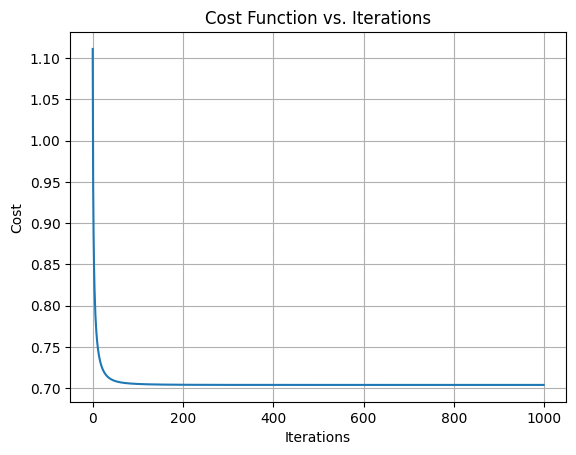

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Softmax function
def softmax(z):
    """
    Compute the softmax probabilities for a given input matrix.

    Parameters:
    z (numpy.ndarray): Logits (raw scores) of shape (m, n), where
                       m is the number of samples.
                       n is the number of classes.

    Returns:
    numpy.ndarray: Softmax probability matrix of shape (m, n), where
                   each row sums to 1 and represents the probability
                   distribution over classes.
    """
    z_exp = np.exp(z - np.max(z, axis=1, keepdims=True))  # For numerical stability
    return z_exp / np.sum(z_exp, axis=1, keepdims=True)

# Gradient Descent for Softmax
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    m = X.shape[0]  # Number of samples
    cost_history = []  # To keep track of the cost at each iteration

    for i in range(n_iter):
        # Forward pass: Compute the softmax probabilities
        z = np.dot(X, W) + b  # Compute logits (XW + b)
        y_pred = softmax(z)  # Apply softmax to compute probabilities

        # Compute the cost (cross-entropy loss)
        cost = -np.sum(y * np.log(y_pred)) / m
        cost_history.append(cost)

        # Backward pass: Compute gradients
        dW = np.dot(X.T, (y_pred - y)) / m
        db = np.sum(y_pred - y, axis=0) / m

        # Update weights and biases
        W -= alpha * dW
        b -= alpha * db

        if show_cost and i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}")

    return W, b, cost_history

# Check if y_train is one-hot encoded and convert if not
def one_hot_encode(y_train, y_test):
    encoder = OneHotEncoder(sparse_output=False)
    y_train = encoder.fit_transform(y_train.reshape(-1, 1))  # One-hot encode labels
    y_test = encoder.transform(y_test.reshape(-1, 1))  # One-hot encode test labels
    return y_train, y_test

# Example Dataset (replace with your own dataset loading)
# Let's assume X_train and y_train are already defined, here's an example split:
# Example dataset: Replace with your data loading
from sklearn.datasets import make_classification

# Generating synthetic data (replace with real data loading)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_classes=3, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the labels
y_train, y_test = one_hot_encode(y_train, y_test)

# Initialize the weights and bias
d = X_train.shape[1]  # Number of features (columns in X_train)
c = y_train.shape[1]  # Number of classes (columns in y_train after one-hot encoding)
W = np.random.randn(d, c) * 0.01  # Small random weights initialized
b = np.zeros(c)  # Bias initialized to 0

# Set hyperparameters for gradient descent
alpha = 0.1  # Learning rate
n_iter = 1000  # Number of iterations to run gradient descent

# Train the model using gradient descent
W_opt, b_opt, cost_history = gradient_descent_softmax(X_train, y_train, W, b, alpha, n_iter, show_cost=True)

# Plot the cost history to visualize the convergence
plt.plot(cost_history)
plt.title('Cost Function vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()


# Linear Seperability and Logistic Regression:

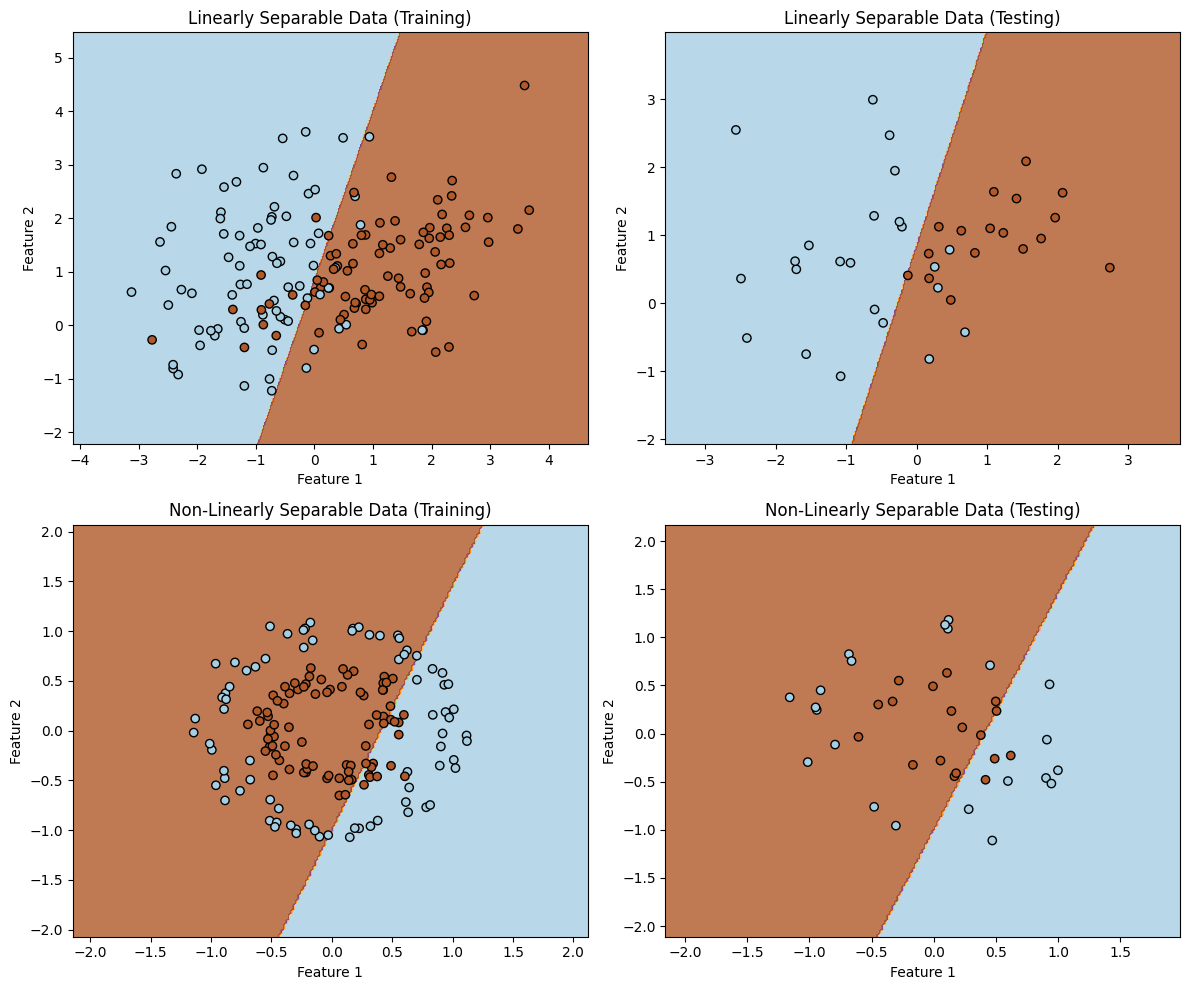

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Set random seed for reproducibility
np.random.seed(42)

# Generate linearly separable dataset
X_linear_separable, y_linear_separable = make_classification(n_samples=200, n_features=2,
                                                             n_informative=2, n_redundant=0,
                                                             n_clusters_per_class=1, random_state=42)

# Split the data into training and testing sets
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_linear_separable, y_linear_separable, test_size=0.2, random_state=42
)

# Train logistic regression model on linearly separable data
logistic_model_linear_separable = LogisticRegression()
logistic_model_linear_separable.fit(X_train_linear, y_train_linear)

# Generate non-linearly separable dataset (circles)
X_non_linear_separable, y_non_linear_separable = make_circles(n_samples=200, noise=0.1, factor=0.5,
                                                              random_state=42)

# Split the data into training and testing sets
X_train_non_linear, X_test_non_linear, y_train_non_linear, y_test_non_linear = train_test_split(
    X_non_linear_separable, y_non_linear_separable, test_size=0.2, random_state=42
)

# Train logistic regression model on non-linearly separable data
logistic_model_non_linear_separable = LogisticRegression()
logistic_model_non_linear_separable.fit(X_train_non_linear, y_train_non_linear)

# Plot decision boundaries for linearly and non-linearly separable data
def plot_decision_boundary(ax, model, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot decision boundary for linearly separable data (Training)
plot_decision_boundary(axes[0, 0], logistic_model_linear_separable, X_train_linear, y_train_linear,
                       'Linearly Separable Data (Training)')

# Plot decision boundary for linearly separable data (Testing)
plot_decision_boundary(axes[0, 1], logistic_model_linear_separable, X_test_linear, y_test_linear,
                       'Linearly Separable Data (Testing)')

# Plot decision boundary for non-linearly separable data (Training)
plot_decision_boundary(axes[1, 0], logistic_model_non_linear_separable, X_train_non_linear,
                       y_train_non_linear, 'Non-Linearly Separable Data (Training)')

# Plot decision boundary for non-linearly separable data (Testing)
plot_decision_boundary(axes[1, 1], logistic_model_non_linear_separable, X_test_non_linear,
                       y_test_non_linear, 'Non-Linearly Separable Data (Testing)')

plt.tight_layout()

# Save the plots as PNG files
plt.savefig('decision_boundaries.png')
plt.show()


**Question - 2: Provide an Interpretation of the Output Based on Your Understanding**

*   For Linearly Separable Data:
The logistic regression model works well because the data can be divided by a straight line. In the plot, you’ll see that one class is on one side of the line, and the other class is on the other side.
When tested on new data (test set), it continues to separate the two classes correctly.

*   For Non-Linearly Separable Data:
The logistic regression model struggles here because the data can't be separated with just a straight line (like in the "circles" dataset). The plot will show that the model doesn’t do a good job separating the two classes.
When we test it with new data, it doesn’t perform well and misclassifies some points.

**Question - 3: Describe Any Challenges You Faced While Implementing the Code Above**

**Generating and Visualizing Data:**

It was easy to generate the datasets using simple functions, but visualizing the decision boundary (the line that separates the classes) can be tricky. For complex data, it's hard to visualize how well the model is doing.

**Limitations of Logistic Regression:**

Logistic regression can only draw straight lines. When the data needs more complex boundaries (like circles), it doesn’t work well. This was a challenge when trying to apply it to non-linear data.

**Evaluating the Model:**

Decision boundary plots show how well the model is doing visually, but they don’t give precise numbers, like accuracy. This made it harder to know how well the model really performed.

**Computational Resources:**

When you work with larger datasets or more complicated plots, it can use up a lot of your computer’s resources, so it’s important to manage them well.

**Plot Layout:**

Making sure the plots look good and don’t overlap can be difficult. I had to adjust the layout and save the figure properly.